In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sabr_simul(F_0, sigma_0, beta, nu, rho, M, T):
    if not (-1 <= rho <= 1):
        raise ValueError("Correlation rho must be between -1 and 1.")
    if M <= 0 or T <= 0:
        raise ValueError("Number of time steps M and total time T must be positive.")

    delta = T / M
    delta_sqrt = np.sqrt(delta)
    rho_sqrt = np.sqrt(1 - rho**2)
    sigma = np.zeros(M + 1)
    F = np.zeros(M + 1)
    sigma[0], F[0] = sigma_0, F_0
    Z = np.random.standard_normal((2, M))

    for m in range(1, M + 1):
        F[m] = F[m-1] + sigma[m-1] * F[m-1]**beta * delta_sqrt * Z[0, m-1]
        sigma[m] = sigma[m-1] + nu * sigma[m-1] * delta_sqrt * (rho * Z[0, m-1] + rho_sqrt * Z[1, m-1])
        if F[m] < 0:
            F[m] = F[m-1]
        if sigma[m] < 0:
            sigma[m] = sigma[m-1]

    return F, sigma

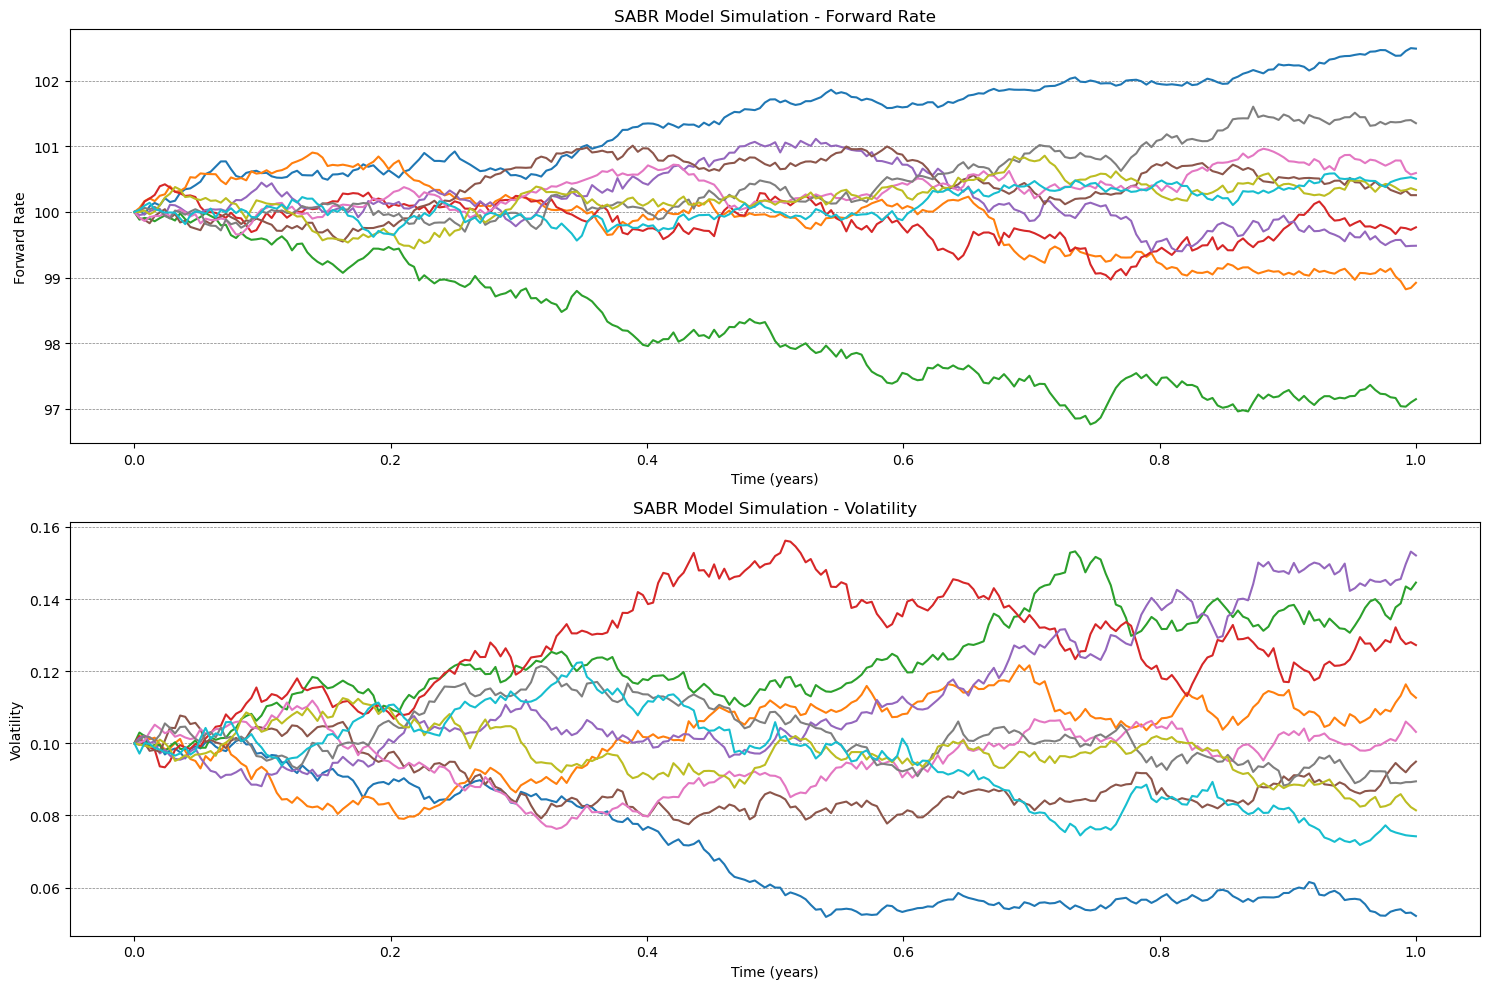

In [7]:
def run_multiple_sabr_simulations(F_0, sigma_0, beta, nu, rho, M, T, num_simulations):
    """
    Runs multiple SABR model simulations and plots each simulation result.

    Parameters:
        F_0 (float): Initial forward rate or asset price.
        alpha_0 (float): Initial volatility.
        beta (float): Elasticity parameter of the SABR model.
        nu (float): Volatility of volatility (vol-vol).
        rho (float): Correlation between the asset price and its volatility.
        M (int): Number of time steps.
        T (float): Total time.
        num_simulations (int): Number of simulations to run.
    """
    plt.figure(figsize=(15, 10))
    
    for i in range(num_simulations):
        F, sigma = sabr_simul(F_0, sigma_0, beta, nu, rho, M, T)
        time_steps = np.linspace(0, T, M + 1)
        plt.subplot(2, 1, 1)
        plt.plot(time_steps, F)
        plt.title('SABR Model Simulation - Forward Rate')
        plt.xlabel('Time (years)')
        plt.ylabel('Forward Rate')
        plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

        plt.subplot(2, 1, 2)
        plt.plot(time_steps, sigma)
        plt.title('SABR Model Simulation - Volatility')
        plt.xlabel('Time (years)')
        plt.ylabel('Volatility')
        plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    
run_multiple_sabr_simulations(100, 0.1, 0.5, 0.25, -0.4, 252, 1.0, 10)  
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/sim_f_and_sigma.png")
plt.show()
plt.close()

